# First experiment to create the plots
Here, we experiment on how to read the data from the EAGLE database and create the first plot to understand which kind of data we have. First, we import the Python packages we are going to use.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table

Checking the *directory* in wich the code is running

In [3]:
os.getcwd()

'/Users/andresfrp/ownCloud/Documents/RECA-internship/Analysis'

Listing the files in the directory

In [4]:
os.listdir(".")

['experiment_plots.ipynb',
 'FirstLuminositiesRECAL.ipynb',
 'FirstData.png',
 'FirstData.pdf',
 '.ipynb_checkpoints',
 'Figure1.ipynb',
 'FirstLuminositiesREF.ipynb',
 'ism.pdf',
 'Figure1.png',
 'FirstLuminositiesISM.ipynb']

Entering the directory in wich the query is stored 

In [5]:
os.chdir(r'../Data')

In [6]:
os.getcwd()
os.listdir(".")

['Query.csv',
 'total_luminosities_RECA.csv',
 '.keep',
 'Q-ref.csv',
 '.ipynb_checkpoints',
 'total_luminosities_frac_RECA.csv',
 'Q_Recal-L0025N0752.csv']

Reading the query table

In [7]:
Table.read('Query.csv', format='ascii')

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.07881416118313611,0.40713978900718306,-0.06330399501307094,0.43317660097754307,0.30411141418415494,0.21791510153279095,0.5888151998171891,0.43475736447011015,3670768.8,3.386793e-05,139429577000.0,128357564000.0,83765552.0
2,0.14115086845045632,0.45540397013578027,0.0016069357965954323,0.4194418575486196,0.3541853068777756,0.260477842965525,0.7316657343093015,0.26345891923277237,3599950.0,7.31597e-09,132794966000.0,121664340000.0,127600848.0
3,0.21260189713746824,0.4947171208411709,0.047972205596559125,0.4290507323475813,0.38789562992127,0.3105566731992107,0.848138163395796,0.21089581822901327,3558926.5,3.8772018e-07,122170941000.0,110975549000.0,201059248.0
4,0.19453083963799633,0.4001068760843328,-0.23217451890708873,0.43591737769213323,0.26111867073700684,0.19435070012723712,0.5245062215512457,0.1979126388916081,3501025.5,1.8196057e-05,203993760000.0,192370328000.0,346410720.0
5,0.22110837478846934,0.0021029095221080096,-0.2734711525572815,0.4713208681569664,0.14222777645385312,0.01194960946415184,0.00190359071071751,0.040310453332101294,3331357.2,0.0001642653,191415550000.0,179377750000.0,843632830.0
6,0.24307254165203662,0.1886542127069395,-0.17955189341659183,0.44761544093734784,0.21045125474426346,0.07785426105326988,0.1860235372118975,0.3144862712043965,2976699.5,9.0003704e-07,151063331000.0,138421027000.0,2169467140.0
7,0.3355855347361052,0.43972802244261655,-0.24839833773468056,0.4054807301363227,0.2748705390874355,0.20586499651581155,0.5258432463928291,0.2536484192907611,2965977.8,4.8014922e-08,234519298000.0,219688534000.0,4707850800.0
8,0.3622733943958599,0.5155763341538696,0.02527457445758463,0.36123460990013156,0.3924876888834857,0.3073785995679593,0.8345391196856949,0.19678504479839135,3083270.0,1.5243896e-06,325848891000.0,308000719000.0,8252066800.0
9,0.361990793939168,0.4603353892148281,-0.29378437052182305,0.41274800630732134,0.2841291114545444,0.21566276368815396,0.5932924599354679,0.1696249284806182,2714422.0,1.381053e-05,306855248000.0,287110300000.0,10776853500.0


We assign this table as a variable. 

In [8]:
First_table = Table.read('Query.csv', format='ascii')

Checking the colums of the table

In [9]:
First_table.columns

<TableColumns names=('GalaxyID','DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','MasaANegro','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas')>

Making arrays of the columns that will be used

In [10]:
Morfparam = ['DMEllipticity', 'DiscToTotal', 'DispAnisotropy', 'Ellipticity', 'KappaCoRot', 'MedOrbitCircu', 'RotToDispRatio', 'Triaxiality']
Subhparam = ['MasaANegro', 'AcrecionMasaANegro', 'Masa', 'MasaMateriaOscura', 'MasaGas']
colors = ['gray', 'blue', 'blueviolet', 'tomato', 'peru', 'limegreen', 'crimson', 'seagreen']

Plotting the data: morphological parameter vs. mass parameters using "for" loops and "enumerate" function. 

<ipython-input-11-f78d6fc120f0>:8: RuntimeWarning: divide by zero encountered in log10
  ax[i_mp, i_sp].scatter(First_table[mparam], np.log10(First_table[sparam]), color=cparam)


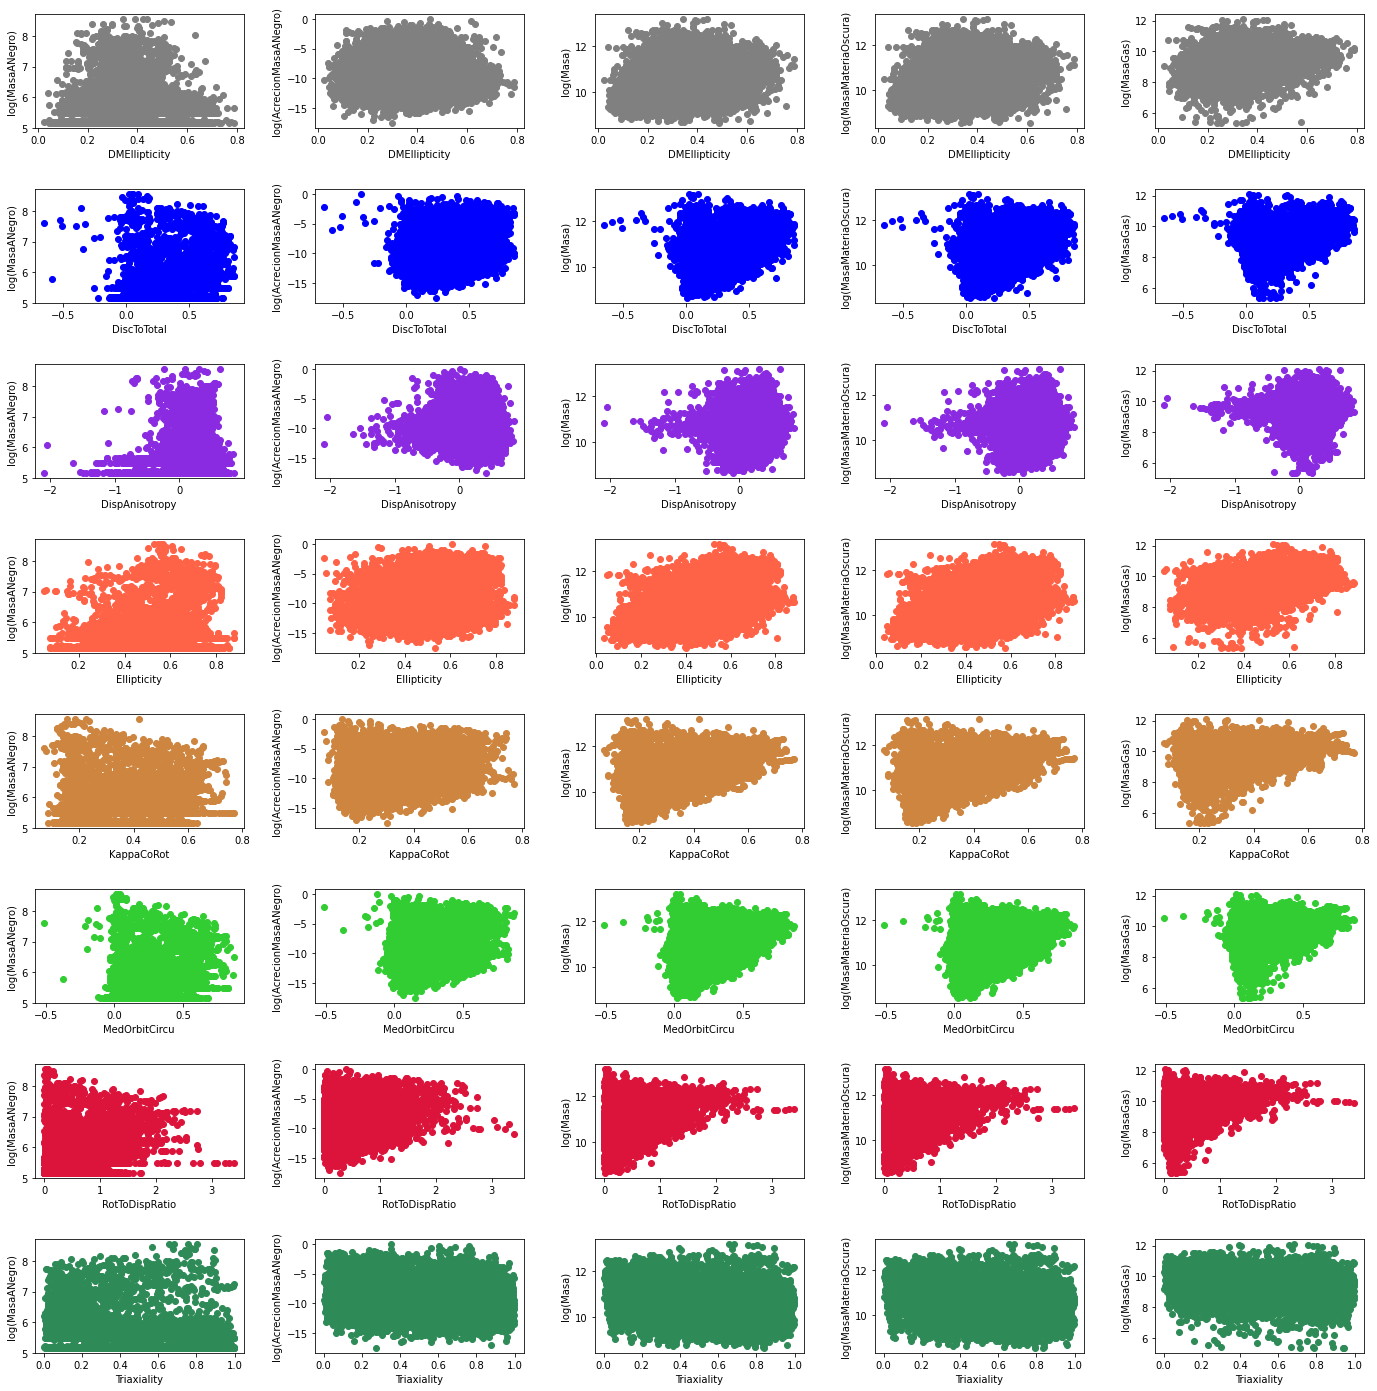

In [11]:
fig, ax = plt.subplots(8,5,figsize=(20,20), facecolor= 'white')
fig.tight_layout(pad=4)

for i_mp, mparam in enumerate(Morfparam):
    for i,cparam in enumerate(colors):        
        if i==i_mp:
            for i_sp, sparam in enumerate(Subhparam): 
                ax[i_mp, i_sp].scatter(First_table[mparam], np.log10(First_table[sparam]), color=cparam)
                ax[i_mp, i_sp].set_xlabel(mparam)
                ax[i_mp, i_sp].set_ylabel("log("+sparam+")")

Changing directory to the one where I want to store the graphics

In [12]:
os.chdir(r'../Analysis')

Saving archives

In [13]:
fig.savefig('FirstData.pdf')

In [14]:
fig.savefig('FirstData.png')